In [11]:
import pandas as pd
import os

# Define the directories
directories = ["data/bonds", "data/fx", "data/indices"]
stocks_directory = "data/stocks"

# Function to perform exploratory data analysis
def exploratory_data_analysis(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            data = pd.read_csv(filepath, parse_dates=True, index_col="Date")
            print(f"Exploratory Data Analysis for {filename}")
            print(data.info())
            break  # Only process the first file

# Perform EDA for the first file in each directory
for directory in directories:
    exploratory_data_analysis(directory)

# Perform EDA for the first file in the stocks directory
stock_files = [f for f in os.listdir(stocks_directory) if f.endswith(".csv")][:1]
for filename in stock_files:
    filepath = os.path.join(stocks_directory, filename)
    data = pd.read_csv(filepath, parse_dates=True, index_col="Date")
    print(f"Exploratory Data Analysis for {filename}")
    print(data.info())

Exploratory Data Analysis for ^IRX.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 433 entries, NaT to 2020-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Adj Close  433 non-null    object
 1   Close      433 non-null    object
 2   High       433 non-null    object
 3   Low        433 non-null    object
 4   Open       433 non-null    object
 5   Volume     433 non-null    object
dtypes: object(6)
memory usage: 23.7+ KB
None
Exploratory Data Analysis for AUDUSD=X.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 176 entries, NaT to 2020-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Adj Close  176 non-null    object
 1   Close      176 non-null    object
 2   High       176 non-null    object
 3   Low        176 non-null    object
 4   Open       176 non-null    object
 5   Volume     176 non-null    object
dtypes: object(6

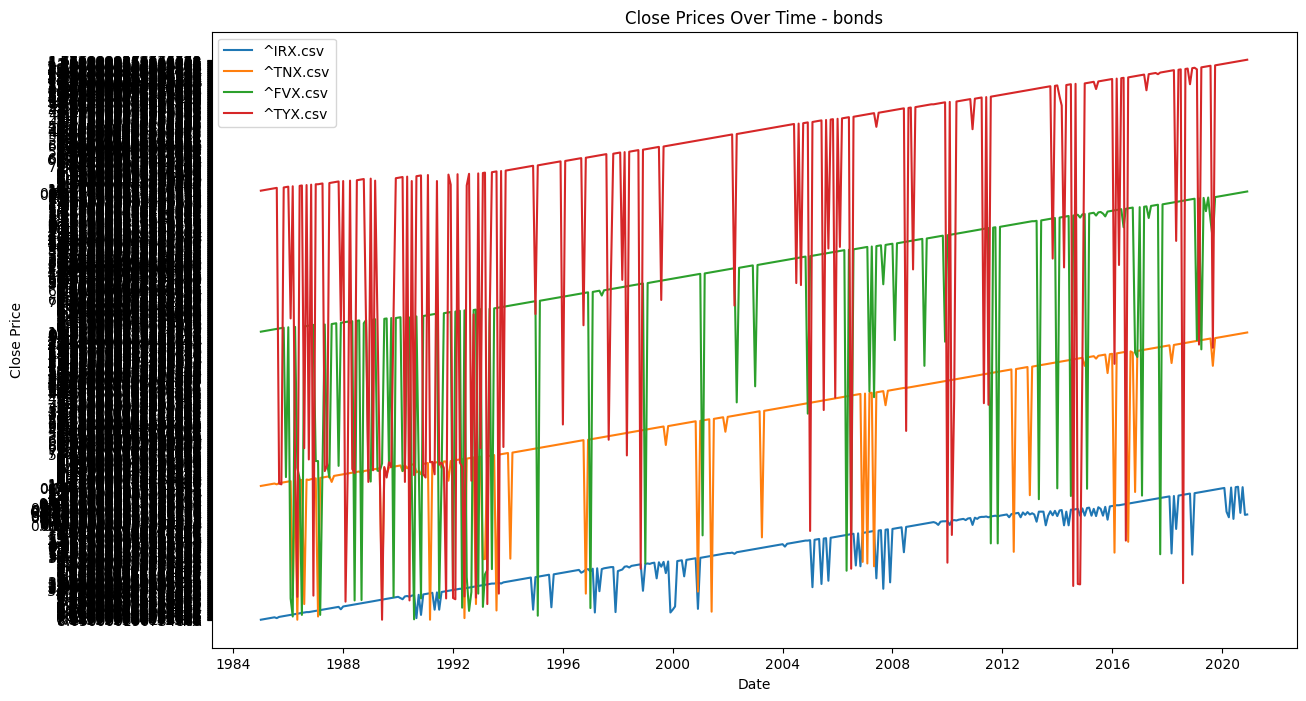

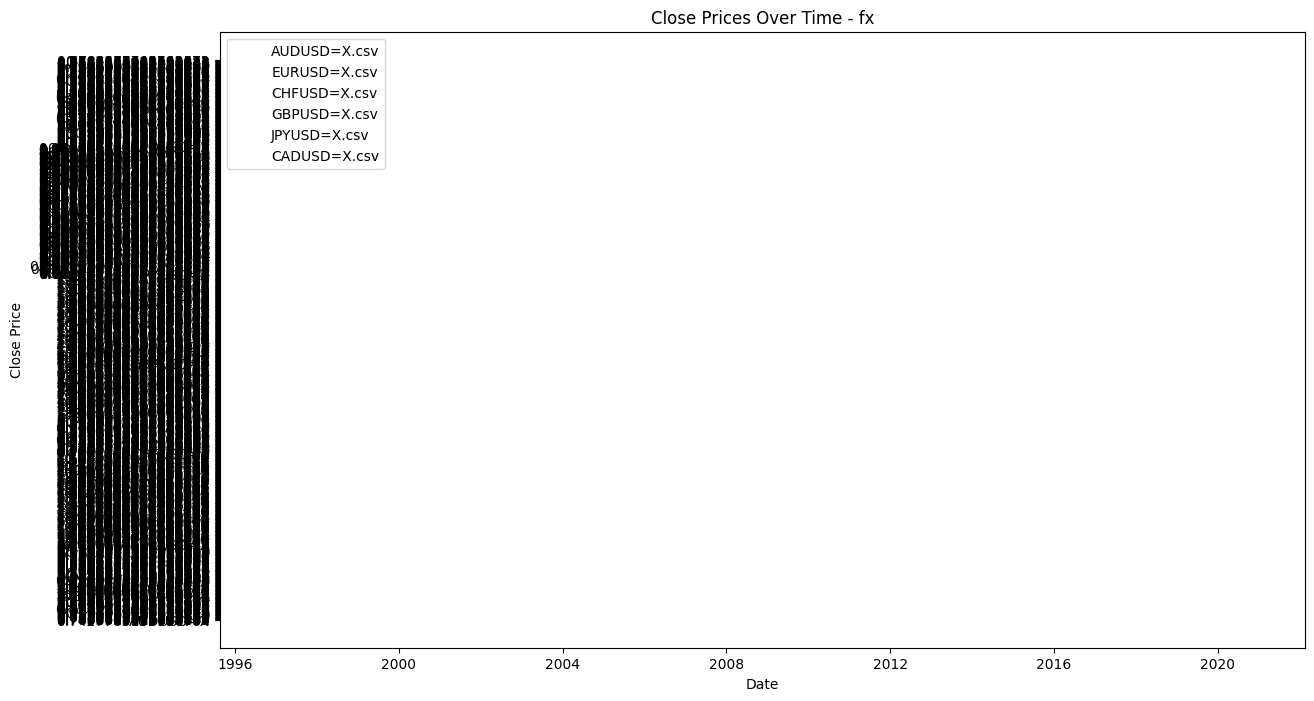

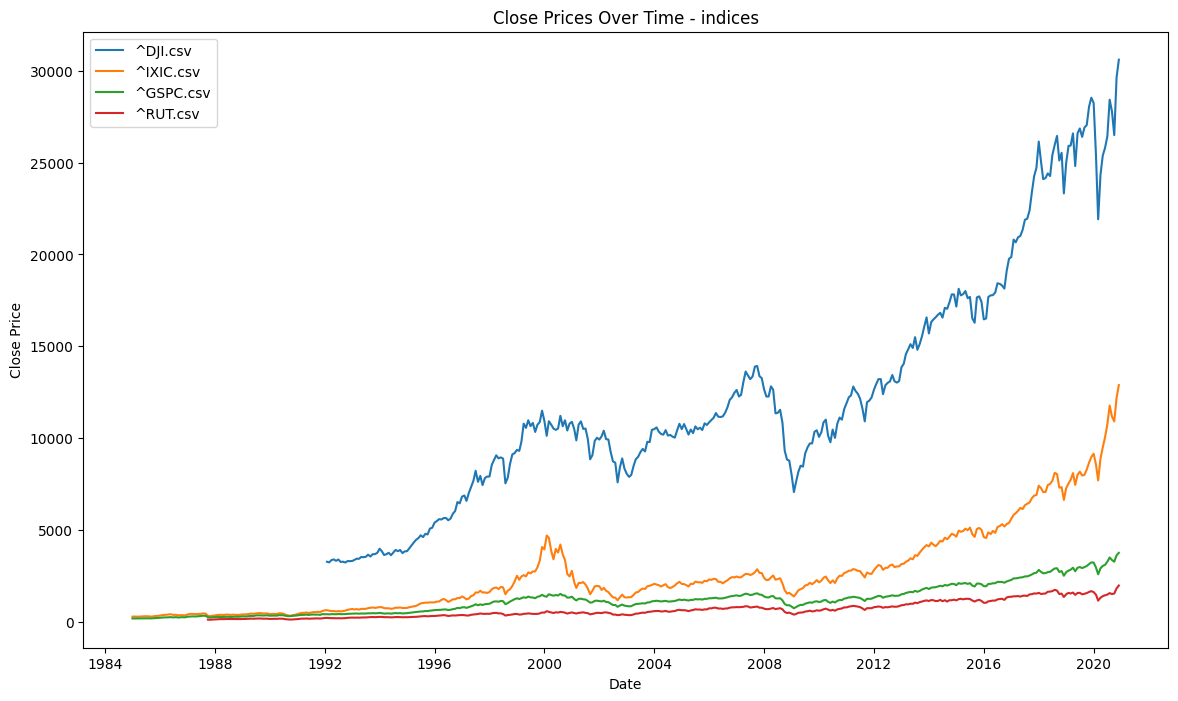

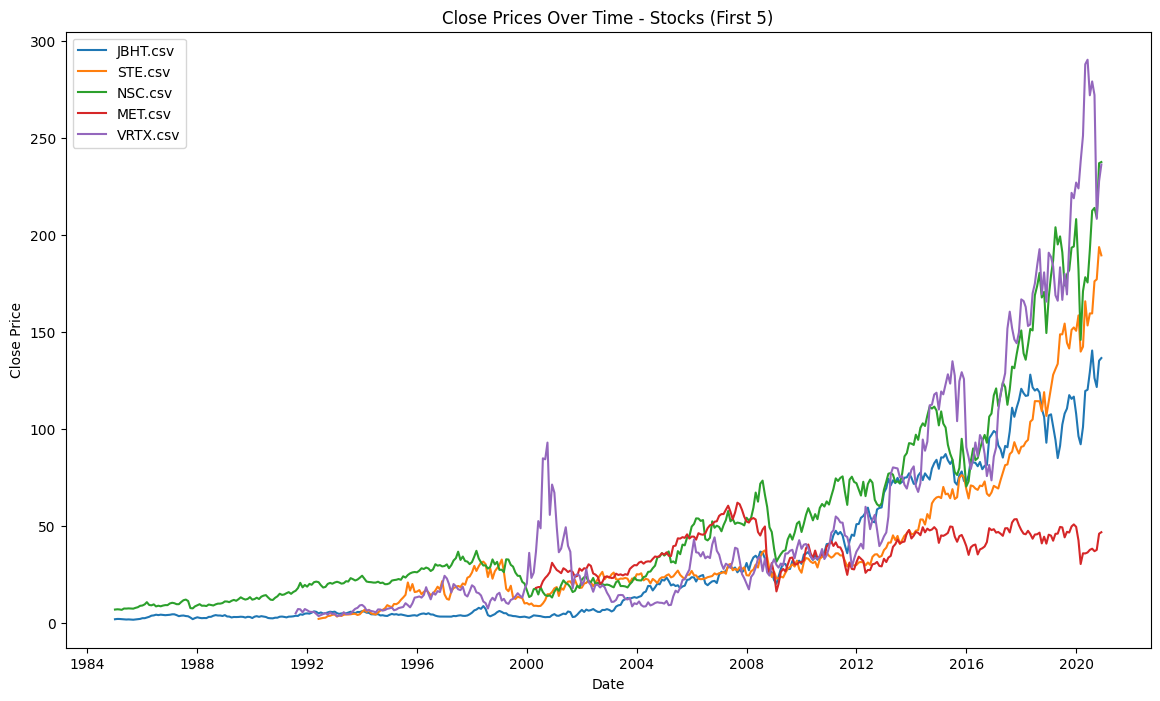

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directories
directories = ["data/bonds", "data/fx", "data/indices"]
stocks_directory = "data/stocks"

# Function to plot data from a directory
def plot_directory_data(directory, hide_data=False):
    plt.figure(figsize=(14, 8))
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            data = pd.read_csv(filepath, parse_dates=True, index_col="Date")
            if hide_data:
                plt.plot(data.index, data["Close"], label=filename, alpha=0)  # Hide data points
            else:
                plt.plot(data.index, data["Close"], label=filename)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.title(f"Close Prices Over Time - {os.path.basename(directory)}")
    plt.legend()
    plt.show()

# Plot data for each directory
for directory in directories:
    hide_data = (directory == "data/fx")  # Hide data points for exchange rates
    plot_directory_data(directory, hide_data)

# Plot data for the first 5 CSV files from the stocks folder
plt.figure(figsize=(14, 8))
stock_files = [f for f in os.listdir(stocks_directory) if f.endswith(".csv")][:5]
for filename in stock_files:
    filepath = os.path.join(stocks_directory, filename)
    data = pd.read_csv(filepath, parse_dates=True, index_col="Date")
    plt.plot(data.index, data["Close"], label=filename)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Close Prices Over Time - Stocks (First 5)")
plt.legend()
plt.show()